In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fear_greed = pd.read_csv('Data/fear_greed_index.csv')
trades = pd.read_csv('Data/historical_data.csv')

In [7]:
fear_greed.columns = fear_greed.columns.str.lower().str.replace(" ", "_")
trades.columns = trades.columns.str.lower().str.replace(" ", "_")

In [8]:
fear_greed["date"] = pd.to_datetime(fear_greed["date"]).dt.date

In [9]:
trades["timestamp_ist"] = pd.to_datetime(trades["timestamp_ist"], errors="coerce")
trades["trade_date"] = trades["timestamp_ist"].dt.date

In [10]:
trades = trades[trades["closed_pnl"] != 0]

In [11]:
btc_trades = trades[trades["coin"].str.contains("BTC", na=False)]

In [12]:
merged = btc_trades.merge(
    fear_greed[["date", "classification"]],
    left_on="trade_date",
    right_on="date",
    how="inner"
)

In [13]:
merged.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,trade_date,date,classification
0,0x8381e6d82f1affd39a336e143e081ef7620a3b7f,BTC,99245.0,0.00600,595.47,SELL,2025-04-02 19:34:00,30.15162,Close Long,0.477000,0x3afae3a5c0247b657f3f041d202159016600a7534026...,69452105544,True,0.208414,1.110000e+15,1.740000e+12,2025-04-02,2025-04-02,Fear
1,0x8381e6d82f1affd39a336e143e081ef7620a3b7f,BTC,99245.0,0.74613,74049.67,SELL,2025-04-02 19:34:00,30.14562,Close Long,59.317335,0x3afae3a5c0247b657f3f041d202159016600a7534026...,69452105544,True,25.917385,8.340000e+14,1.740000e+12,2025-04-02,2025-04-02,Fear
2,0x8381e6d82f1affd39a336e143e081ef7620a3b7f,BTC,99241.0,1.28374,127399.64,SELL,2025-04-02 19:34:00,29.39949,Close Long,96.922370,0x3afae3a5c0247b657f3f041d202159016600a7534026...,69452105544,True,44.589874,4.220000e+14,1.740000e+12,2025-04-02,2025-04-02,Fear
3,0x8381e6d82f1affd39a336e143e081ef7620a3b7f,BTC,99241.0,0.04816,4779.45,SELL,2025-04-02 19:34:00,28.11575,Close Long,3.636080,0x3afae3a5c0247b657f3f041d202159016600a7534026...,69452105544,True,1.672806,1.120000e+15,1.740000e+12,2025-04-02,2025-04-02,Fear
4,0x8381e6d82f1affd39a336e143e081ef7620a3b7f,BTC,99241.0,4.06003,402921.44,SELL,2025-04-02 19:34:00,28.06759,Close Long,306.532265,0x3afae3a5c0247b657f3f041d202159016600a7534026...,69452105544,True,141.022503,8.390000e+14,1.740000e+12,2025-04-02,2025-04-02,Fear


In [14]:
merged["is_profit"] = merged["closed_pnl"] > 0

In [15]:
merged.groupby("classification")["closed_pnl"].mean()

classification
Extreme Fear     141.942044
Extreme Greed    107.789384
Fear             155.545925
Greed             43.148591
Neutral           59.707289
Name: closed_pnl, dtype: float64

In [16]:
merged.groupby("classification")["is_profit"].mean() * 100

classification
Extreme Fear     100.000000
Extreme Greed     82.926829
Fear              91.569767
Greed             69.075630
Neutral           68.316832
Name: is_profit, dtype: float64

In [17]:
merged.groupby("classification")["account"].count()

classification
Extreme Fear      40
Extreme Greed    123
Fear             344
Greed            595
Neutral          101
Name: account, dtype: int64

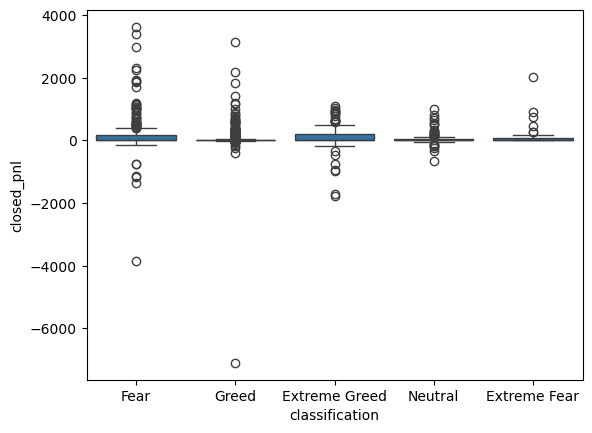

In [18]:
sns.boxplot(x="classification", y="closed_pnl", data=merged)
plt.show()

<Axes: xlabel='classification'>

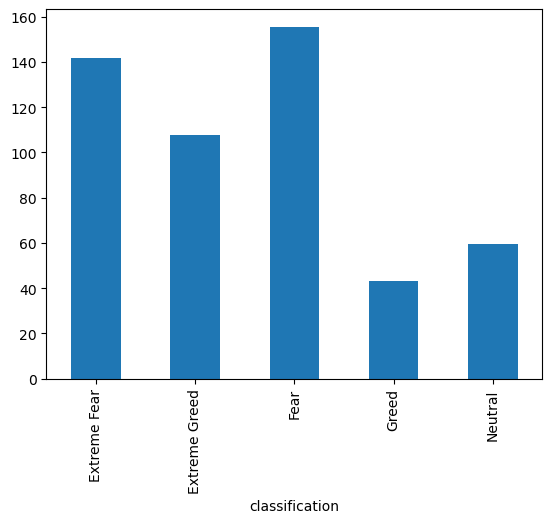

In [19]:
merged.groupby("classification")["closed_pnl"].mean().plot(kind="bar")

<Axes: xlabel='classification'>

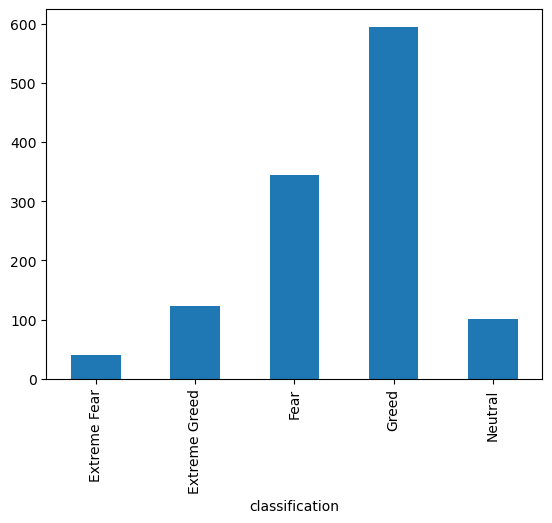

In [20]:
merged.groupby("classification")["account"].count().plot(kind="bar")

Conclusion

- Traders generally perform better during Greed and Extreme Greed periods. 
  When the market is optimistic, traders take more positions and are able to 
  generate higher average profits.

- Trading activity increases noticeably during Greed phases, which suggests 
  higher confidence and aggressive participation driven by positive market sentiment.

- During Fear and Extreme Fear periods, traders tend to trade less frequently. 
  However, losses during these periods are often deeper, indicating panic-driven 
  decisions and poor trade timing.

- Overall, market sentiment has a clear impact on trader behavior. Greed encourages 
  higher risk-taking and activity, while Fear leads to cautious behavior but 
  more severe losses when trades go wrong.
